In [37]:
import altair as alt
from vega_datasets import data
import pandas as pd
alt.renderers.enable('mimetype')

RendererRegistry.enable('mimetype')

In [38]:
world = data.world_110m()
world_map = alt.topo_feature(data.world_110m.url, 'countries')
world_map

UrlData({
  format: TopoDataFormat({
    feature: 'countries',
    type: 'topojson'
  }),
  url: 'https://cdn.jsdelivr.net/npm/vega-datasets@v1.29.0/data/world-110m.json'
})

In [39]:
country_ids = pd.read_csv("../data/processed/happiness_merge_all.csv")
country_ids.dropna(subset=['id'])

,id,Country,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,...,Density (P/Km²),Land Area (Km²),Migrants (net),Rank,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,8.0,Albania,Central and Eastern Europe,4.8827,0.056116,4.992687,4.772713,9.417931,0.671070,68.708138,...,105,27400,-14000,424.0,37.250,10.180,24.430,28.330,31.350,35.89
1,12.0,Algeria,Middle East and North Africa,5.0051,0.044236,5.091802,4.918397,9.537965,0.803385,65.905174,...,18,2381740,-10000,469.0,33.440,8.930,21.840,33.220,21.350,36.42
2,32.0,Argentina,Latin America and Caribbean,5.9747,0.053442,6.079446,5.869954,9.810955,0.900568,68.803802,...,17,2736690,4800,409.0,38.570,11.750,25.870,29.660,37.470,59.76
3,51.0,Armenia,Commonwealth of Independent States,4.6768,0.058595,4.791646,4.561953,9.100476,0.757479,66.750656,...,104,28470,-4998,472.0,33.160,9.670,22.040,25.400,33.310,33.43
4,36.0,Australia,North America and ANZ,7.2228,0.041841,7.304808,7.140791,10.720596,0.944855,73.604538,...,3,7682300,158246,126.2,72.033,38.904,56.352,64.478,72.537,133.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,858.0,Uruguay,Latin America and Caribbean,6.4401,0.045419,6.529121,6.351079,9.948193,0.922811,69.002548,...,20,175020,-3000,295.0,58.050,17.980,39.090,44.970,56.330,50.08
97,860.0,Uzbekistan,Commonwealth of Independent States,6.2576,0.054228,6.363886,6.151314,8.740372,0.926596,65.107574,...,79,425400,-8863,490.0,29.940,9.430,20.230,24.990,21.660,25.17
98,862.0,Venezuela,Latin America and Caribbean,5.0532,0.064281,5.179190,4.927210,8.977794,0.890408,66.505341,...,32,882050,-653249,500.0,27.820,8.430,18.640,28.400,23.630,4.18
99,704.0,Vietnam,Southeast Asia,5.3535,0.033801,5.419749,5.287251,8.809546,0.849987,67.952736,...,314,310070,-80000,416.0,38.080,14.735,27.030,36.080,20.305,37.22


In [40]:
country_ids = country_ids[country_ids['Ladder score'] != "mo"].sort_values(by="Ladder score", ascending = False)
country_ids = country_ids.reset_index(drop = True)
country_ids['Hapiness World Rank'] = pd.Series(range(1,101))
country_ids.head()

,id,Country,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,...,Land Area (Km²),Migrants (net),Rank,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,Hapiness World Rank
0,246.0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,...,303890,14000,82.750000,75.887500,28.870,53.630000,60.3825,86.600000,117.982500,1.0
1,208.0,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,...,42430,15200,27.500000,84.037500,31.945,59.377500,63.4175,104.642500,114.617500,2.0
2,756.0,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,...,39516,52000,4.666667,120.631667,52.845,88.543333,115.9350,122.388333,132.776667,3.0
3,352.0,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,...,100250,380,7.000000,112.570000,57.400,86.450000,98.5300,127.870000,94.210000,4.0
4,578.0,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,...,365268,28000,10.750000,105.185000,41.670,75.120000,89.7775,121.442500,109.547500,5.0


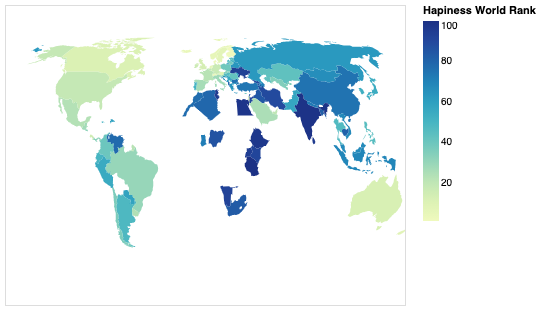

In [41]:
map_click = alt.selection_multi()
(alt.Chart(world_map).mark_geoshape().transform_lookup(
    lookup='id',
    from_=alt.LookupData(country_ids, 'id', ['Country', 'Hapiness World Rank']))
 .encode(tooltip=['Country:N', 'Hapiness World Rank:Q'], 
         color='Hapiness World Rank:Q',
         opacity=alt.condition(map_click, alt.value(1), alt.value(0.2)))
 .add_selection(map_click)
 .project('equalEarth', scale=90))

In [42]:
df = pd.read_csv("../data/processed/happiness_merge_all.csv")

def plot_worldmap(country_ids=df.copy()):
    world = data.world_110m()
    world_map = alt.topo_feature(data.world_110m.url, 'countries')
    
    country_ids.dropna(subset=['id'])
    country_ids = country_ids[country_ids['Ladder score'] != "mo"].sort_values(by="Ladder score", ascending = False)
    country_ids = country_ids.reset_index(drop = True)
    country_ids['Hapiness World Rank'] = pd.Series(range(1,101))
    
    map_click = alt.selection_multi()
    chart = (
    (alt.Chart(world_map).mark_geoshape().transform_lookup(
        lookup='id',
        from_=alt.LookupData(country_ids, 'id', ['Country', 'Hapiness World Rank']))
     .encode(tooltip=['Country:N', 'Hapiness World Rank:Q'], 
             color='Hapiness World Rank:Q',
             opacity=alt.condition(map_click, alt.value(1), alt.value(0.2)))
     .add_selection(map_click)
     .project('equalEarth', scale=90))
    )
    return chart

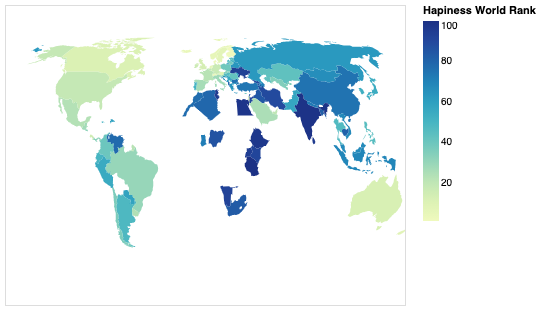

In [43]:
plot_worldmap()